In [1]:
import pandas as pd
import ta
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')

In [2]:
# Load data

df = pd.read_csv("BTC_USD.csv", sep=",")
df = df.round()

In [3]:
# Clean nan values
df = ta.utils.dropna(df)

print(df.columns)

# Add all ta features filling nans values
df = ta.add_all_ta_features(
    df,"Open", "High", "Low", "Close", "Volumen", fillna=True
)

print(df.columns)
print(len(df.columns))

Index(['Date', 'Close', 'Open', 'High', 'Low', 'Volumen', 'Change %'], dtype='object')


/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


Index(['Date', 'Close', 'Open', 'High', 'Low', 'Volumen', 'Change %',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi',
       'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst

In [4]:
df.head()

,Date,Close,Open,High,Low,Volumen,Change %,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,18-Jan-18,11045.0,11101.0,11881.0,10515.0,85240,-0.33%,-19094.758419,85240,-0.224012,0.000000e+00,50.000000,0.000000e+00,0.000000e+00,19541.878765,1000.000000,11147.000000,0.0,11045.000000,11045.000000,11045.000000,0.000000,0.000000,0.0,0.0,11147.000000,12513.000000,9781.000000,24.508836,0.462665,0.0,0.0,10515.0,11881.0,11198.0,12.367587,0.387994,0.0,0.000000,0.000000,0.000000,11045.000000,11045.000000,11045.000000,11045.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,28.562072,1.000000,0.000000,-2061.302559,229.449241,229.449241,0.000000,11198.0,11198.0,11198.0,11198.0,8822.012569,8715.659506,4.0,4.0,0.0,-1.0,-1.0,0.0,0.0,0.0,100.000000,0.0,0.0,0.0,0.000000,0.000000,38.799414,38.799414,-61.200586,0.0,11045.000000,0.0,0.000000,0.000000,0.000000,22.944924,0.000000,0.000000
1,19-Jan-18,11476.0,11036.0,11879.0,10649.0,48550,3.90%,-2358.823459,133790,-0.017631,2.092505e+07,100.000000,1.672091e+08,1.672091e+08,21452.780241,1039.022182,11215.100879,0.0,11260.500000,11691.500000,10829.500000,7.655077,0.750000,0.0,0.0,11240.833333,12538.833333,9942.833333,23.094373,0.590588,0.0,0.0,10515.0,11881.0,11198.0,12.130900,0.703514,0.0,34.381766,6.876353,27.505413,11260.500000,11260.500000,11111.307692,11076.925926,0.0,0.0,0.0,0.330482,0.298500,0.031982,0.007622,1.984007,66.666667,-2276.802559,253.437137,241.443189,11.993948,11198.0,11198.0,11198.0,11198.0,8822.012569,8715.659506,8.0,4.0,4.0,-1.0,-1.0,0.0,0.0,0.0,100.000000,0.0,0.0,0.0,100.000000,31.856703,70.351391,54.575403,-29.648609,0.0,11232.763970,0.0,-3.546727,-0.709345,-2.837381,3.902218,3.828006,3.902218
2,20-Jan-18,12728.0,11462.0,13002.0,11425.0,46300,10.91%,27852.146737,180090,0.154657,2.621684e+07,100.000000,3.234042e+09,1.700626e+09,6945.729445,1152.376641,11515.874544,0.0,11749.666667,13177.291579,10322.041755,24.300688,0.842644,0.0,0.0,11622.222222,13013.222222,10231.222222,23.936902,0.897476,0.0,0.0,10515.0,13002.0,11758.5,21.166558,0.889827,0.0,160.801877,37.661458,123.140419,11749.666667,11749.666667,11360.029586,11199.227709,0.0,0.0,0.0,0.651613,0.295566,0.356047,0.042143,2.999166,100.000000,-2765.969226,307.887620,263.591333,44.296287,11758.5,11758.5,11758.5,11758.5,8822.012569,8715.659506,12.0,4.0,8.0,-1.0,11881.0,0.0,1.0,0.0,100.000000,0.0,0.0,0.0,100.000000,51.042416,88.982710,66.044505,-11.017290,0.0,11829.418930,0.0,-6.721114,-1.911699,-4.809415,10.909725,10.354639,15.237664
3,21-Jan-18,11514.0,12732.0,12732.0,11020.0,53620,-9.54%,5176.399074,126470,0.022149,1.317234e+07,64.064711,-1.077583e+09,7.745561e+08,-63.087245,1152.376641,11570.813487,0.0,11690.750000,12943.841677,10437.658323,21.437319,0.429474,0.0,0.0,11655.500000,13126.750000,10184.250000,25.245592,0.451912,0.0,0.0,10515.0,13002.0,1175

In [19]:
df.set_index(pd.to_datetime(df['Date'], infer_datetime_format=True), inplace=True)

KELTNER CHANNEL

Keltner Channels are a trend following indicator used to identify reversals with channel breakouts and channel
direction. Channels can also be used to identify overbought and oversold levels when the trend is flat.
Trends often start with strong moves in one direction or another. A surge above the upper channel line shows extraordinary strength, while a plunge below the lower channel line shows extraordinary weakness. Such strong moves can signal the end of one trend and the beginning of another.



In [20]:
df['keltner_long'] = np.where(df['volatility_kchi'] <1, 1.1, 0.0)
df['keltner_short'] = np.where(df['volatility_kcli'] ==0, -1.0, 0.0)
df['keltner_signal'] = df['keltner_long'] + df['keltner_short']

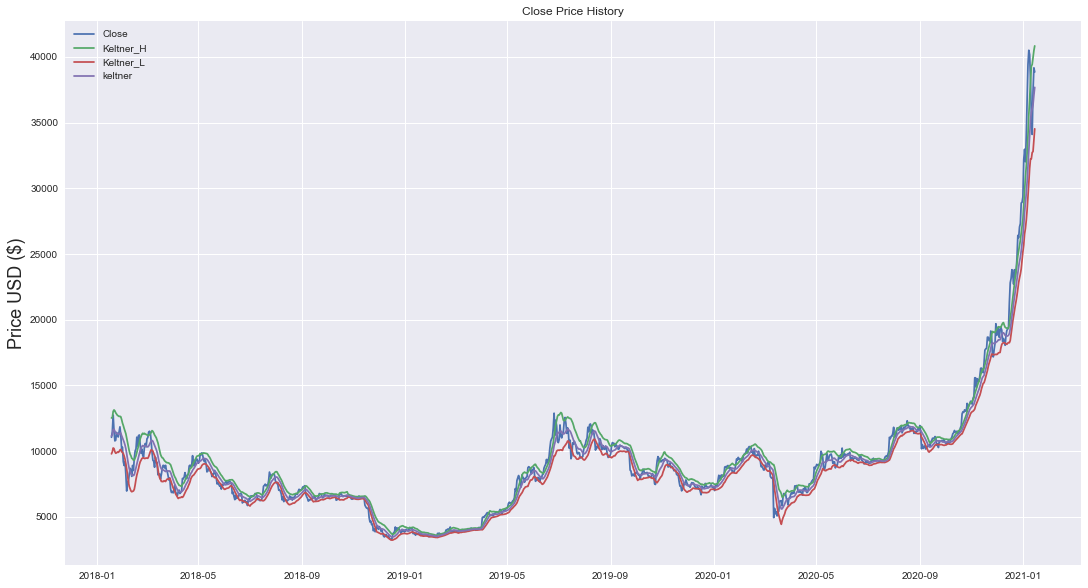

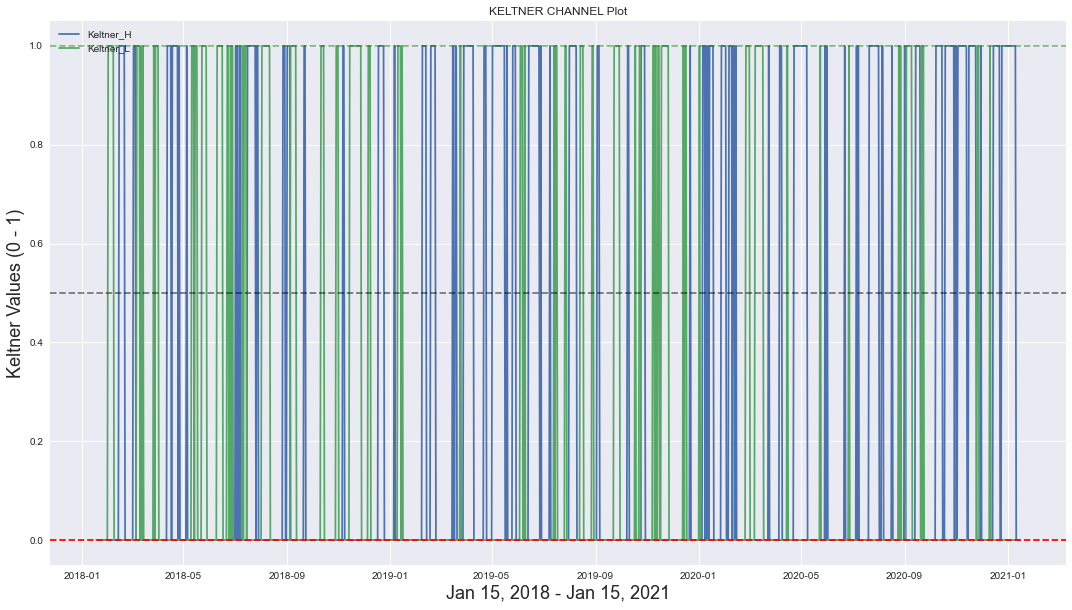

In [121]:
keltner_df = pd.DataFrame()
keltner_df['Close'] = df['Close']
keltner_df['Keltner_H'] =df['volatility_kch']
keltner_df['Keltner_L'] =df['volatility_kcl']
keltner_df['keltner'] = df['volatility_kcc']
plt.figure(figsize=(18.2,10))
plt.plot(keltner_df.index, keltner_df['Close'])
plt.plot(keltner_df['Keltner_H'])
plt.plot(keltner_df['Keltner_L'])
plt.plot(keltner_df['keltner'])
#,keltner_df['Low'],keltner_df['keltner'])
plt.title('Close Price History')
plt.ylabel('Price USD ($)',fontsize=18)
plt.legend(keltner_df.columns.values, loc='upper left')
plt.show()

keltner_df['keltner_high']=df['volatility_kchi']
keltner_df['keltner_low']=df['volatility_kcli']
plt.figure(figsize=(18.2,10))
keltner_df = keltner_df.drop(columns=['Close','keltner'])
plt.title('KELTNER CHANNEL Plot')
plt.plot(keltner_df.index, keltner_df['keltner_high'], keltner_df['keltner_low'])
plt.legend(keltner_df.columns.values, loc='upper left')
plt.axhline(0.5, linestyle='--', alpha=0.5, color = 'black')
plt.axhline(1, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(0, linestyle='--',color = 'red')
plt.xlabel('Jan 15, 2018 - Jan 15, 2021',fontsize=18)
plt.ylabel('Keltner Values (0 - 1)',fontsize=18)
plt.show()

AROON INDICATOR

The Aroon indicator is a technical indicator that is used to identify trend changes in the price of an asset, as well as the strength of that trend. In essence, the indicator measures the time between highs and the time between lows over a time period. The idea is that strong uptrends will regularly see new highs, and strong downtrends will regularly see new lows. The indicator signals when this is happening, and when it isn't.


The indicator consists of the "Aroon up" line, which measures the strength of the uptrend, and the "Aroon down" line, which measures the strength of the downtrend. When the Aroon Up is above the Aroon Down, it indicates bullish price behavior.
When the Aroon Down is above the Aroon Up, it signals bearish price behavior.

In [87]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
df['aaron_up'] = df['trend_aroon_up']
df['aaron_down'] = df['trend_aroon_down']

# Construct a crossover trading signal
df['aaron_long'] = np.where(df['aaron_up'] > df['aaron_down'], 1.0, 0.0)
df['aaron_short'] = np.where(df['aaron_up'] < df['aaron_down'], -1.0, 0.0)
df['aaron_signal'] = df['aaron_long'] + df['aaron_short']

df.head()

,Date,Close,Open,High,Low,Volumen,Change %,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,keltner_long,keltner_short,keltner_signal,vortex_long,vortex_short,vortex_signal,ulcer_hold,ulcer_sell,ulcer_signal,tadx,adx_long,adx_short,adx_signal,aaron_up,aaron_down,aaron_long,aaron_short,aaron_signal
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-18,18-Jan-18,11045.0,11101.0,11881.0,10515.0,85240,-0.33%,-19094.758419,85240,-0.224012,0.000000e+00,50.000000,0.000000e+00,0.000000e+00,19541.878765,1000.000000,11147.000000,0.0,11045.000000,11045.000000,11045.000000,0.000000,0.000000,0.0,0.0,11147.000000,12513.000000,9781.000000,24.508836,0.462665,0.0,0.0,10515.0,11881.0,11198.0,12.367587,0.387994,0.0,0.000000,0.000000,0.000000,11045.000000,11045.000000,11045.000000,11045.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,28.562072,1.000000,0.000000,-2061.302559,229.449241,229.449241,0.000000,11198.0,11198.0,11198.0,11198.0,8822.012569,8715.659506,4.0,4.0,0.0,-1.0,-1.0,0.0,0.0,0.0,100.000000,0.0,0.0,0.0,0.000000,0.000000,38.799414,38.799414,-61.200586,0.0,11045.000000,0.0,0.000000,0.000000,0.000000,22.944924,0.000000,0.000000,1.1,-1.0,0.1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,4.0,4.0,0.0,0.0,0.0
2018-01-19,19-Jan-18,11476.0,11036.0,11879.0,10649.0,48550,3.90%,-2358.823459,133790,-0.017631,2.092505e+07,100.000000,1.672091e+08,1.672091e+08,21452.780241,1039.022182,11215.100879,0.0,11260.500000,11691.500000,10829.500000,7.655077,0.750000,0.0,0.0,11240.833333,12538.833333,9942.833333,23.094373,0.590588,0.0,0.0,10515.0,11881.0,11198.0,12.130900,0.703514,0.0,34.381766,6.876353,27.505413,11260.500000,11260.500000,11111.307692,11076.925926,0.0,0.0,0.0,0.330482,0.298500,0.031982,0.007622,1.984007,66.666667,-2276.802559,253.437137,241.443189,11.993948,11198.0,11198.0,11198.0,11198.0,8822.012569,8715.659506,8.0,4.0,4.0,-1.0,-1.0,0.0,0.0,0.0,100.000000,0.0,0.0,0.0,100.000000,31.856703,70.351391,54.575403,-29.648609,0.0,11232.763970,0.0,-3.546727,-0.709345,-2.837381,3.902218,3.828006,3.902218,1.1,-1.0,0.1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,8.0,4.0,1.0,0.0,1.0
2018-01-20,20-Jan-18,12728.0,11462.0,13002.0,11425.0,46300,10.91%,27852.146737,180090,0.154657,2.621684e+07,100.000000,3.234042e+09,1.700626e+09,6945.729445,1152.376641,11515.874544,0.0,11749.666667,13177.291579,10322.041755,24.300688,0.842644,0.0,0.0,11622.222222,13013.222222,10231.222222,23.936902,0.897476,0.0,0.0,10515.0,13002.0,11758.5,21.166558,0.889827,0.0,160.801877,37.661458,123.140419,11749.666667,11749.666667,11360.029586,11199.227709,0.0,0.0,0.0,0.651613,0.295566,0.356047,0.042143,2.999166,100.000000,-2765.969226,307.887620,263.591333,44.296287,11758.5,11758.5,11758.5,11758.5,8822.012569,8715.659506,12.0,4.0,8.0,-1.0,11881.

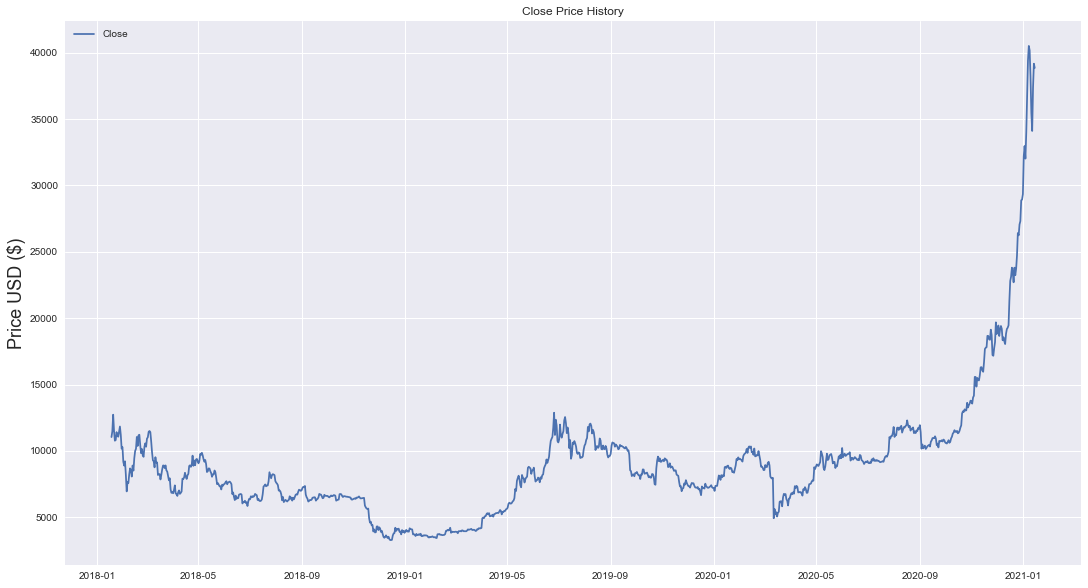

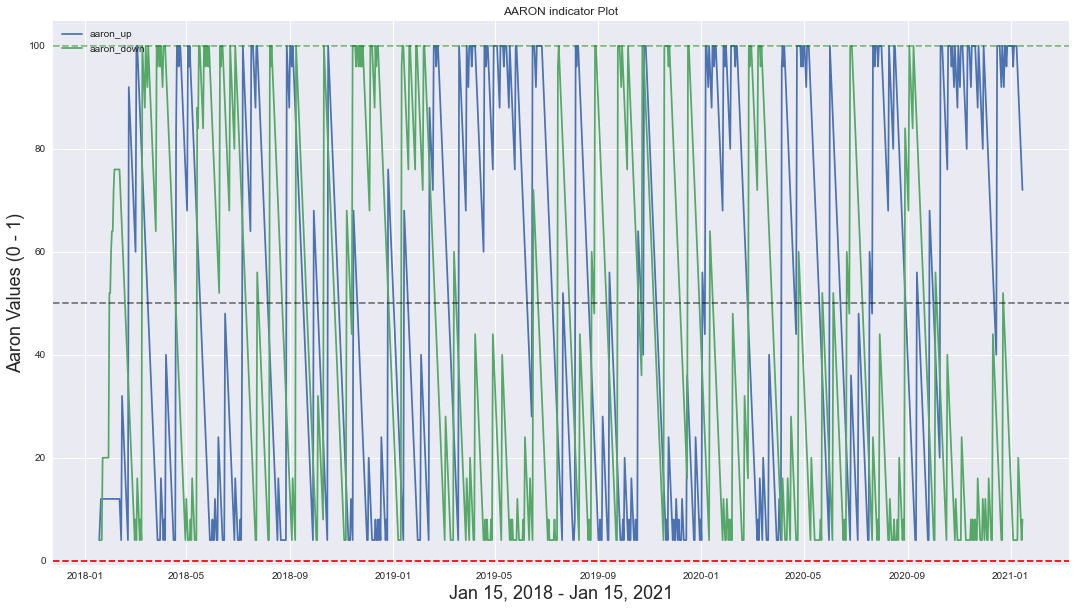

In [128]:
aaron_df = pd.DataFrame()
aaron_df['Close'] = df['Close']

plt.figure(figsize=(18.2,10))
plt.plot(aaron_df.index, aaron_df['Close'])
plt.title('Close Price History')
plt.ylabel('Price USD ($)',fontsize=18)
plt.legend(aaron_df.columns.values, loc='upper left')
plt.show()
aaron_df['Aaron'] = df['trend_aroon_ind']
aaron_df['aaron_up']=df['aaron_up']
aaron_df['aaron_down']=df['aaron_down']
plt.figure(figsize=(18.2,10))
aaron_df = aaron_df.drop(columns=['Close','Aaron'])
plt.title('AARON indicator Plot')
plt.plot(aaron_df.index, aaron_df['aaron_up'], aaron_df['aaron_down'])
plt.legend(aaron_df.columns.values, loc='upper left')
plt.axhline(50, linestyle='--', alpha=0.5, color = 'black')
plt.axhline(100, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(0, linestyle='--',color = 'red')
plt.xlabel('Jan 15, 2018 - Jan 15, 2021',fontsize=18)
plt.ylabel('Aaron Values (0 - 1)',fontsize=18)
plt.show()

VORTEX INDICATOR

A bullish signal triggers when the positive trend indicator crosses above the negative trend indicator or a key level. A bearish signal triggers when the negative trend indicator crosses above the positive trend indicator or a key level. The Vortex Indicator is either above or below these levels, which means it always has a clear bullish or bearish bias.

In [22]:
df['vortex_long'] = np.where(df['trend_vortex_ind_diff'] >= 1, 1.0, 0.0)
df['vortex_short'] = np.where(df['trend_vortex_ind_diff'] < 0, -1.0, 0.0)
df['vortex_signal'] = df['vortex_long'] + df['vortex_short']

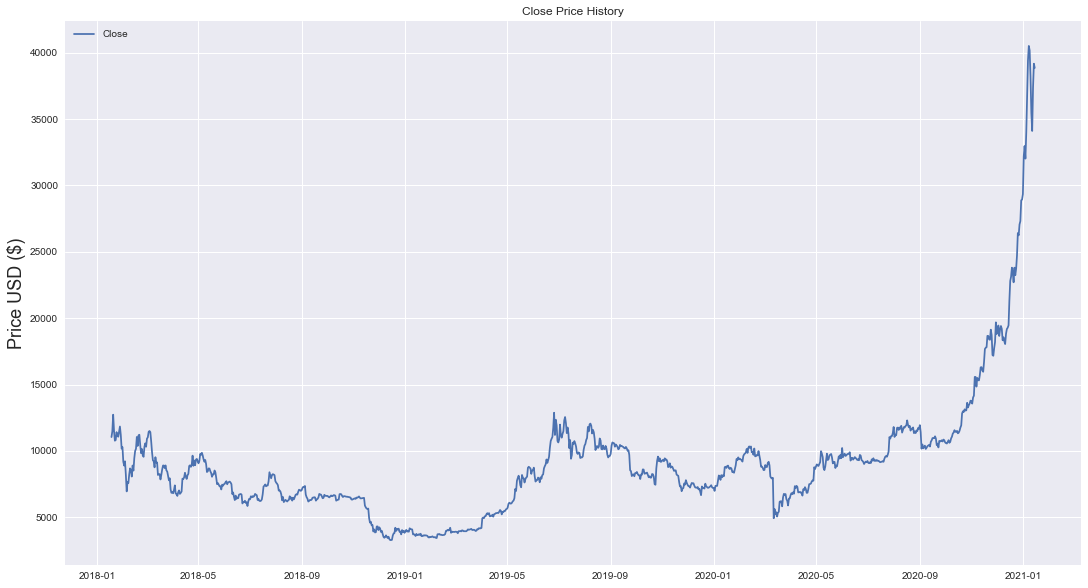

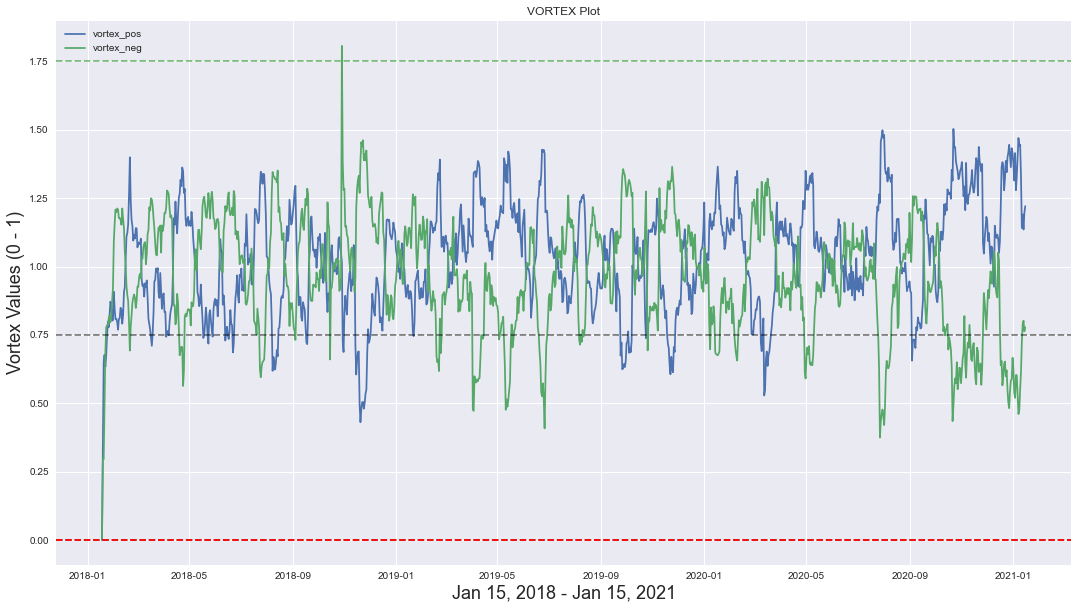

In [123]:
vortex_df = pd.DataFrame()
vortex_df['Close'] = df['Close']

plt.figure(figsize=(18.2,10))
plt.plot(vortex_df.index, vortex_df['Close'])
plt.title('Close Price History')
plt.ylabel('Price USD ($)',fontsize=18)
plt.legend(vortex_df.columns.values, loc='upper left')
plt.show()
vortex_df['Vortex'] = df['trend_vortex_ind_diff']
vortex_df['vortex_pos']=df['trend_vortex_ind_pos']
vortex_df['vortex_neg']=df['trend_vortex_ind_neg']
plt.figure(figsize=(18.2,10))
vortex_df = vortex_df.drop(columns=['Close','Vortex'])
plt.title('VORTEX Plot')
plt.plot(vortex_df.index, vortex_df['vortex_pos'],vortex_df['vortex_neg'])
plt.legend(vortex_df.columns.values, loc='upper left')
plt.axhline(0, linestyle='--', alpha=0.5, color = 'black')
plt.axhline(1.75, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(0, linestyle='--',color = 'red')
plt.axhline(0.75, linestyle='--', alpha=0.5, color = 'black')
plt.xlabel('Jan 15, 2018 - Jan 15, 2021',fontsize=18)
plt.ylabel('Vortex Values (0 - 1)',fontsize=18)
plt.show()

ULCER INDEX

“Ulcer Index measures the depth and duration of percentage drawdowns in price from earlier highs. The greater a drawdown in value, and the longer it takes to recover to earlier highs, the higher the UI. Technically, 
it is the square root of the mean of the squared percentage drawdowns in value.
The squaring effect penalizes large drawdowns proportionately more than small drawdowns.”
The index hovers near zero when prices regularly record higher highs and advance. 
The index rises when prices move lower and extend from their recent high. Keep in mind that the Ulcer Index is not an indicator per se. 
It is just a measure of downside risk that can be used to compute risk-adjusted returns.

In [11]:
df['ulcer_hold'] = np.where(df['volatility_ui'] == 0, 1.0, 0.0)
df['ulcer_sell'] = np.where(df['volatility_ui'] > 0, -1.0, 0.0)
df['ulcer_signal'] = df['ulcer_hold'] + df['ulcer_sell']

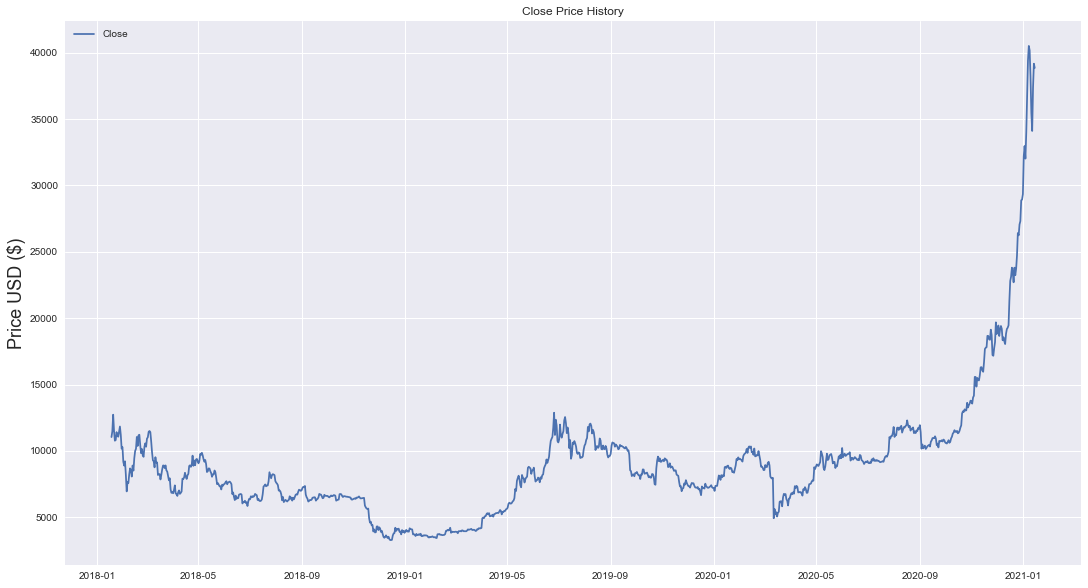

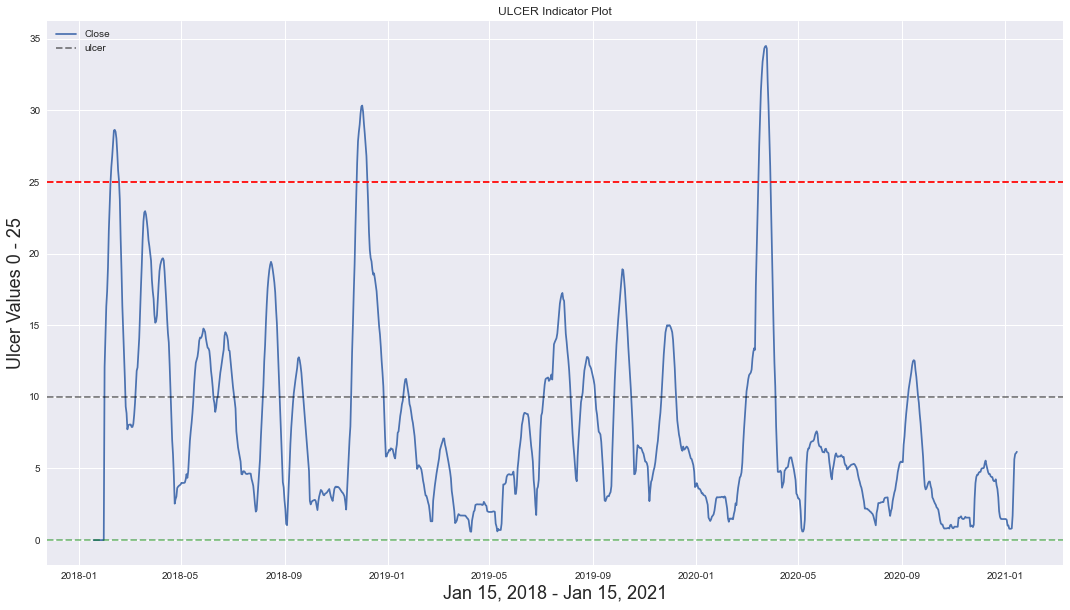

In [127]:
ulcer_df = pd.DataFrame()
ulcer_df['Close'] = df['Close']
ulcer_df['ulcer'] = df['volatility_ui']
#ulcer_df['ulcer_pos']=df['ulcer_hold']
#ulcer_df['ulcer_neg']=df['ulcer_sell']
plt.figure(figsize=(18.2,10))
plt.plot(ulcer_df.index, ulcer_df['Close'])
plt.title('Close Price History')
plt.ylabel('Price USD ($)',fontsize=18)
plt.legend(ulcer_df.columns.values, loc='upper left')
plt.show()
plt.figure(figsize=(18.2,10))
plt.title('ULCER Indicator Plot')
plt.plot(ulcer_df.index, ulcer_df['ulcer'])
plt.axhline(10, linestyle='--', alpha=0.5, color = 'black')
plt.axhline(0, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(25, linestyle='--',color = 'red')
plt.xlabel('Jan 15, 2018 - Jan 15, 2021',fontsize=18)
plt.ylabel('Ulcer Values 0 - 25',fontsize=18)
plt.legend(ulcer_df.columns.values, loc='upper left')
plt.show()

In [13]:
df['tadx'] = np.where(df['trend_adx_pos'] > df['trend_adx_neg'], 1.1, 0.0)


In [14]:
df['adx_long'] = np.where(df['trend_adx']>20, 1.1, 0.0)
df['adx_short'] = np.where(df['trend_adx']<20, -1.0, 0.0)
df['adx_signal'] = df['adx_long'] + df['adx_short']
    
    
    

    
        
    


In [15]:
df['tadx']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1089    1.1
1090    1.1
1091    1.1
1092    1.1
1093    1.1
Name: tadx, Length: 1094, dtype: float64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')


df.shape

 Bollinger Bands¶

In [ ]:
plt.plot(df[1:1094].Close)
plt.plot(df[1:1094].volatility_bbh, label='High BB')
plt.plot(df[1:1094].volatility_bbl, label='Low BB')
plt.plot(df[1:1094].volatility_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

Keltner Channel

In [ ]:
plt.plot(df[1:1094].Close)
plt.plot(df[1:1094].volatility_kcc, label='Central KC')
plt.plot(df[1:1094].volatility_kch, label='High KC')
plt.plot(df[1:1094].volatility_kcl, label='Low KC')
plt.title('Keltner Channel')
plt.legend()
plt.show()

In [ ]:

plt.plot(df[1:1094].Close)
plt.plot(df[1:1094].trend_ichimoku_a, label='Ichimoku a')
plt.plot(df[1:1094].trend_ichimoku_b, label='Ichimoku b')
plt.title('Ichimoku Kinko Hyo')
plt.legend()
plt.show()


In [ ]:
for col in df.columns:
    plt.plot(df[col])
    plt.title(col)
    plt.show()